In [2]:
import numpy as np
import matlab.engine
import matplotlib.pyplot as plt

from uav_interface import fit_poly_matlab

eng = matlab.engine.start_matlab()
eng.addpath(r'/mnt/c/Users/petter/coding/quadrotor/lib', nargout=0)

In [3]:
t_ivals = np.array([0, 2, 4, 6])
xyz_ivals = np.array([[0, 1, 0, 2],
                      [1, 3, 1, 3],
                      [0, 1, 2, 3]])

udp_message = fit_poly_matlab(eng, t_ivals, xyz_ivals)
print(udp_message)

b'\x04\x00\x00\x00!\x00\x00\x00!\x00\x00\x00!\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x00\x00\x80@\x00\x00\xc0@\x94\xf0\x8b\xbc\xdd2|<\x134r= :\x93\xbdee\x8f\xbbx\x93\x18>\xfa\xb9\xa2\xbe\xa8\x81\xba\xbe7\xfd\x06?n\x92E?\xa9u\x81>\x94\xc8\xff9\xbc8,;\xe3Y\xdd\xba\xb5tW;\xa4\xc6\xb9;Uk\x1e\xbe\xe7\xd3t\xbdY\xd6Z?\r\x0c\xba>\x98_\x9a\xbfy\x89D>t\xe4\xc3<\xdaI\xaf<\xb3\x85\xa9\xbd^y\xc4\xbd\xfd\xf9/<=\x0c(>\xe5\xb1\xe7>c\x00\xae\xbe\r\x86\x81\xbf\x00\t\xa0?j\xc2\xcd?\x9do\xec\xbc\xa7/\xd4<\xaa\x9b\xcc=P\xec\xf2\xbdJ\xb3\x1f\xbc\xc1\x04g>\xe3\xcf\x0b\xbf\x92G\x07\xbf\xf7\xb3\x84?7\xa1\xb2?e[\xb9?\x88#O)\x9a\x7fr;C\t7\xaaQ\xa6\xa2;\x0c\x10\xe4\xaaXie\xbe`\x0e3-\x895\xa1?L\x10\xe5/"\xd2\x02\xc0\x00\x00\x00@\x9do\xec<\xa7/\xd4<\xaa\x9b\xcc\xbdP\xec\xf2\xbdJ\xb3\x1f<\xc1\x04g>\xe3\xcf\x0b?\x92G\x07\xbf\xf7\xb3\x84\xbf7\xa1\xb2?NR#@\x10&!\xbc\xe0\x9e\x10<\xa1t\x0b=h0 \xbdM2\xc0\xbb&\xce~=\x9e\x903\xbe\xeex\xb2\xbd\x9f\x1d\xf9>\xc6"\x0e?,\x8c.>`\x92q\xa5\xdbG\xa5:\x84\x00\xfe\xa6\xfdLB:\xc5\x9c

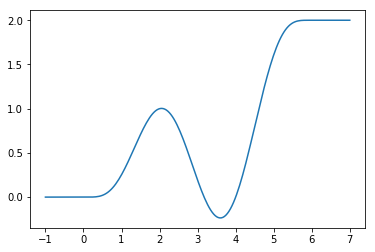

In [4]:
t_ivals_m = matlab.double(list(t_ivals))
x_ivals_m = matlab.double(list(xyz_ivals[0,:]))

x_res_m = eng.optimize1d(t_ivals_m, x_ivals_m, matlab.double([10]), matlab.double([4]), nargout=2)

poly = lambda t: eng.pwpolyval(t_ivals_m, x_res_m[0], matlab.double([t]), nargout=1)

tt = np.linspace(-1, 7, 200)
xx = np.vectorize(poly)(tt)

plt.plot(tt, xx)
plt.show()

In [5]:
eng.quit()